## Performance check of max_sum

Let's create batches of 1000 random numbers and find the max_sum with the different algorithms discussed in the lecture.


1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


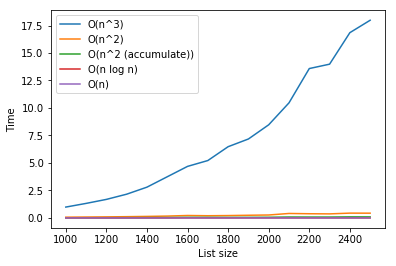


### V1: N^3 ####



In [ ]:
%reset -s -f 

import random
from time import time

#####################
# Version 1: N^3
#####################
def max_sum_v1(A):
    max_so_far = 0
    N = len(A)
    for i in range(N):
        for j in range(i,N):
            tmp_sum = sum (A[i:j+1])
            max_so_far = max(tmp_sum, max_so_far)
    
    return max_so_far


#####################
# Version 2: N^2
#####################
def max_sum_v2(A):
    N = len(A)
    max_so_far = 0
    space = 0
    for i in range(N):
        tot = 0 #ACCUMULATOR!
        for j in range(i,N):
            tot = tot + A[j]
            max_so_far = max(max_so_far, tot)
    return max_so_far



#####################
# Version 2: (accumulate) N^2
#####################
from itertools import accumulate
def max_sum_v2_bis(A):
    N = len(A)
    max_so_far = 0
    #space = 0
    for i in range(N):
        tot = max(accumulate(A[i:]))
        max_so_far = max(max_so_far,tot)

    return max_so_far



#####################
# Version 3: N log N
#####################
def max_sum_v3_rec(A, i, j):
    if i == j:
        return max(0, A[i])
    m = (i+j)//2
    maxML = 0
    s = 0
    for k in range(m,i-1,-1):
        s = s + A[k]
        maxML = max(maxML, s)
    
    maxMR = 0
    s = 0
    for k in range(m+1, j+1):
        s = s + A[k]
        maxMR = max(maxMR, s)
    maxL = max_sum_v3_rec(A,i,m) #Left maximal subvector
    maxR = max_sum_v3_rec(A,m+1,j) #Right maximal subvector
    
    return max(maxL, maxR, maxML + maxMR)




#####################
# Version 4: N
#####################
def max_sum_v3_rec_bis(A,i,j):
    if i == j:
        return max(0,A[i])
    m = (i+j)//2
    maxL = max_sum_v3_rec_bis(A,i,m)
    maxR = max_sum_v3_rec_bis(A, m+1, j)
    maxML = max(accumulate(A[m:-len(A) + i -1: -1]))
    maxMR = max(accumulate(A[m+1:j+1]))
    return max(maxL, maxR, maxML+ maxMR)

def max_sum_v3(A):
    return max_sum_v3_rec_bis(A,0,len(A) - 1)


def max_sum_v4(A):
    max_so_far = 0
    max_here = 0
    for val in A:
        max_here = max(val + max_here, 0)
        max_so_far = max(max_so_far, max_here)
    return max_so_far



if __name__ == "__main__":
    values = [random.randint(-30,30) for x in range(0,500000)]

    from matplotlib import pyplot as plt
   
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    
    for i in range(1000,2501,100):
        print(i)
        x.append(i)
        st = time()
        max_sum_v1(values[0:i])
        y1.append(time()-st)
        st = time()
        max_sum_v2(values[0:i])
        y2.append(time()-st)
        st = time()
        max_sum_v2_bis(values[0:i])
        y3.append(time()-st)
        st = time()
        max_sum_v3(values[0:i])
        y4.append(time()-st)
        st = time()
        max_sum_v4(values[0:i])
        y5.append(time()-st)
        
    
    
    plt.plot(x, y1, label='O(n^3)')
    plt.plot(x, y2, label='O(n^2)')
    plt.plot(x, y3, label='O(n^2 (accumulate))')
    plt.plot(x, y4, label='O(n log n)')
    plt.plot(x, y5, label='O(n)')
    plt.legend()
    plt.ylabel("Time")
    plt.xlabel("List size")
    plt.show()
        #print("V1: {} elements. Max sum: {}. Elapsed time: {:.3f}s".format(i,
        #                                                                   max_sum_v1(values[0:i]), 
        #                                                                   time()-st))
        
    print("\n### V1: N^3 ####\n")
     
    go = input("Ready?")
    print("\n### V2: N^2 ####\n")
    
    for i in range(1000,10001,1000):
        st = time()
        print("V2: {} elements. Max sum: {}. Elapsed time: {:.3f}s".format(i,
                                                                           max_sum_v2(values[0:i]), 
                                                                           time()-st))
    
    go = input("Ready?")
    print("\n### V2: N^2 (accumulate) ####\n")
    
    for i in range(1000,10001,1000):
        st = time()
        print("V2 bis: {} elements. Max sum: {}. Elapsed time: {:.3f}s".format(i,
                                                                           max_sum_v2_bis(values[0:i]), 
                                                                           time()-st))
    
    
    go = input("Ready?")
    print("\n### V3: N log N ####\n")
    

    
    for i in range(1000,50001,1000):
        st = time()
        print("V3: {} elements. Max sum: {}. Elapsed time: {:.3f}s".format(i,
                                                                           max_sum_v3(values[0:i]), 
                                                                           time()-st))
    
    go = input("Ready?")
    print("\n### V4: N ####\n")
    
    for i in range(1000,100001,1000):
        st = time()
        print("V4: {} elements. Max sum: {}. Elapsed time: {:.3f}s".format(i,
                                                                           max_sum_v3(values[0:i]), 
                                                                           time()-st))
    print("\nAll done!")